<h1> k-armed bandits</h1>
<img src="rl.png" />
<h4>In the next 2 sections the environmant is a bandit or MDP. Both are different models and it is important to recognize which terminology is common between the 2 models and which are different.  </h4>

<h4>Reward:random variable $R$,  win or lose a binary value. Can be an amount, amount of jackpot</h4>
<h4>Action:random variable $A$, pulling of the bandit arm</h4>
<h4>State:random variable  $S$, state of the bandit, the wheels indicating the state for a machine but there is no S in k-armed bandit model. State used for MDPs</h4>
<h4>Transition function: $p(s'|a,s)$ There is no transition probability for bandits! </h4>
<h4>Q: estimated reward, it is improper to refer to a reward as a constant R.  </h4>
<h4></h4>


True rewards shape: torch.Size([10]) tensor([ 0.2895,  0.6835,  0.1673, -0.2206,  0.4791,  0.5355, -0.9854, -0.6884,
        -0.9773, -1.2384])
True rewards shape: torch.Size([10]) tensor([-0.1498,  0.6689, -0.1067,  0.0592,  0.5811,  0.2021, -2.1159, -1.4471,
         0.1120,  0.6401])
step: 0
select argmax: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
step reward: tensor(1.9867) 1.9866950511932373
updtae self.action_counts[action]: tensor(1.)
updtae alpha: tensor(1.)
updtae reward: 1.9866950511932373
after update: action, q_estimates: 0 tensor(1.9867)
step: 1
select argmax: tensor([1.9867, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])
step reward: tensor(-0.0652) -0.06517907977104187
updtae self.action_counts[action]: tensor(2.)
updtae alpha: tensor(0.5000)
updtae reward: -0.06517907977104187
after update: action, q_estimates: 0 tensor(0.9608)
step: 2
select argmax: tensor([0.9608, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


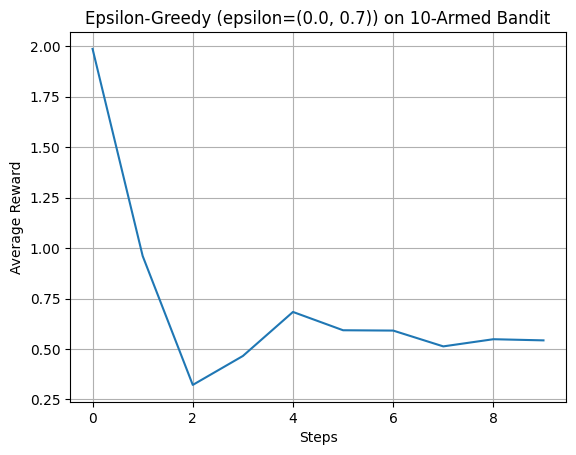

In [4]:
# 🎯 PyTorch Example: k-Armed Bandit with Epsilon-Greedy Strategy

import torch
import random
import matplotlib.pyplot as plt

class KArmedBandit:
    def __init__(self, k=10):
        self.k = k
        self.true_rewards = torch.randn(k)  # True action values
        print("True rewards shape:", self.true_rewards.shape, self.true_rewards)

    def step(self, action):
        reward = torch.normal(mean=self.true_rewards[action], std=torch.tensor(1.0))
        print("step reward:",reward,reward.item())
        return reward.item()

class EpsilonGreedyAgent:
    def __init__(self, k, epsilon):
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = torch.zeros(k)  # Estimated values
        self.action_counts = torch.zeros(k)  # N(a)

    def select_action(self):
        if random.random() < self.epsilon:
            print("epsilon")
            return random.randint(0, self.k - 1)
        else:
            print("select argmax:",self.q_estimates)
            return torch.argmax(self.q_estimates).item()

    def update(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1.0 / self.action_counts[action]
        print("updtae self.action_counts[action]:",self.action_counts[action])
        print("updtae alpha:",alpha)
        print("updtae reward:",reward)
        
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])
        print("after update: action, q_estimates:",action, self.q_estimates[action])

# Simulation
k = 10
epsilon1 = 0.0
epsilon2 = 0.7
steps_T = 10
bandit = KArmedBandit(k)
bandit2 = KArmedBandit(k)
agent = EpsilonGreedyAgent(k, epsilon1)
agent2 = EpsilonGreedyAgent(k, epsilon2)

rewards = []
rewards2 = []
for t in range(steps_T):
    print("step:",t)
    action = agent.select_action()
    #action2 = agent2.select_action()
    #print(action, action2)
    reward = bandit.step(action)
    #reward2 = bandit2.step(action)
    #print(reward,reward2)
    agent.update(action, reward)
    #agent2.update(action2, reward2)
    rewards.append(reward)
    #rewards2.append(reward2)
    
#print(len(rewards), len(rewards2))
# for idx in range(10):
#     print(rewards[idx], rewards2[idx])
#torch.tensor(rewards2).cumsum(0)/(torch.arange(steps)+1)
# Plot results
plt.plot(torch.tensor(rewards).cumsum(0) / (torch.arange(steps_T) + 1)) #blue?
#plt.plot()
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title(f"Epsilon-Greedy (epsilon={epsilon1,epsilon2}) on {k}-Armed Bandit")
plt.grid(True)
plt.show()